# #2.Bokeh Plot

The following is not a journal plot but one of the plots that I was using in the analysis of a new project I am working in quite extensively.<br>

#### Problem Description:
I was calculating bias at various smoothing scales in real space and comparing with bias in fourier space. Since there were 4-5 different smoothing scales, I could not plot all of them together, or else the plot gets too cluttered. On the other hand, plotting them separately made it hard to compare things.
##### How bokeh helps?
Adding bokeh and the interactivity simplifies this quite significantly by using checkboxes and lets me plot two or three at a time and helps in analysis.<br>
Being able to zoom and drag the plots is also very helpful since some points are outliers that mess up with the x-y scalings

In [98]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import os, sys
directory = os.getcwd()

temp = {}
prefix = ["s", "m", "l"]
sizes = [690, 1380, 3000]
rvalues = [10, 20, 40, 60, 80]
for foo in range(3):
    pf = str(prefix[foo])
    size = sizes[foo]
    
    key = pf + "_m"
    val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bias_mass_%d_hmfcor.txt"%size)[:, 0]
    temp[key] = val
    key = pf + "_bf"
    val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bias_mass_%d_hmfcor.txt"%size)[:, -2]
    temp[key] = val
    key = pf + "_bfer"
    val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bias_mass_%d_hmfcor.txt"%size)[:, -1]
    temp[key] = val
    for boo in range(5):
        R = str(rvalues[boo])
        key = pf + "_bpdf_"+ R
        val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bs2_pdf_%d.txt"%size)[:, 2*boo + 1]
        temp[key] = val
        key = pf + "_bpdfer_"+ R
        val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bs2_pdf_%d.txt"%size)[:, 2*boo + 2]
        temp[key] = val
        key = pf + "_breal_"+ R
        val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bs2_real_%d_hmfcor.txt"%size)[:, 2*boo + 1]
        temp[key] = val
        key = pf + "_brealer_"+ R
        val = numpy.loadtxt(directory + "/Data/Mean_value_bias/bs2_real_%d_hmfcor.txt"%size)[:, 2*boo + 2]
        temp[key] = val
        

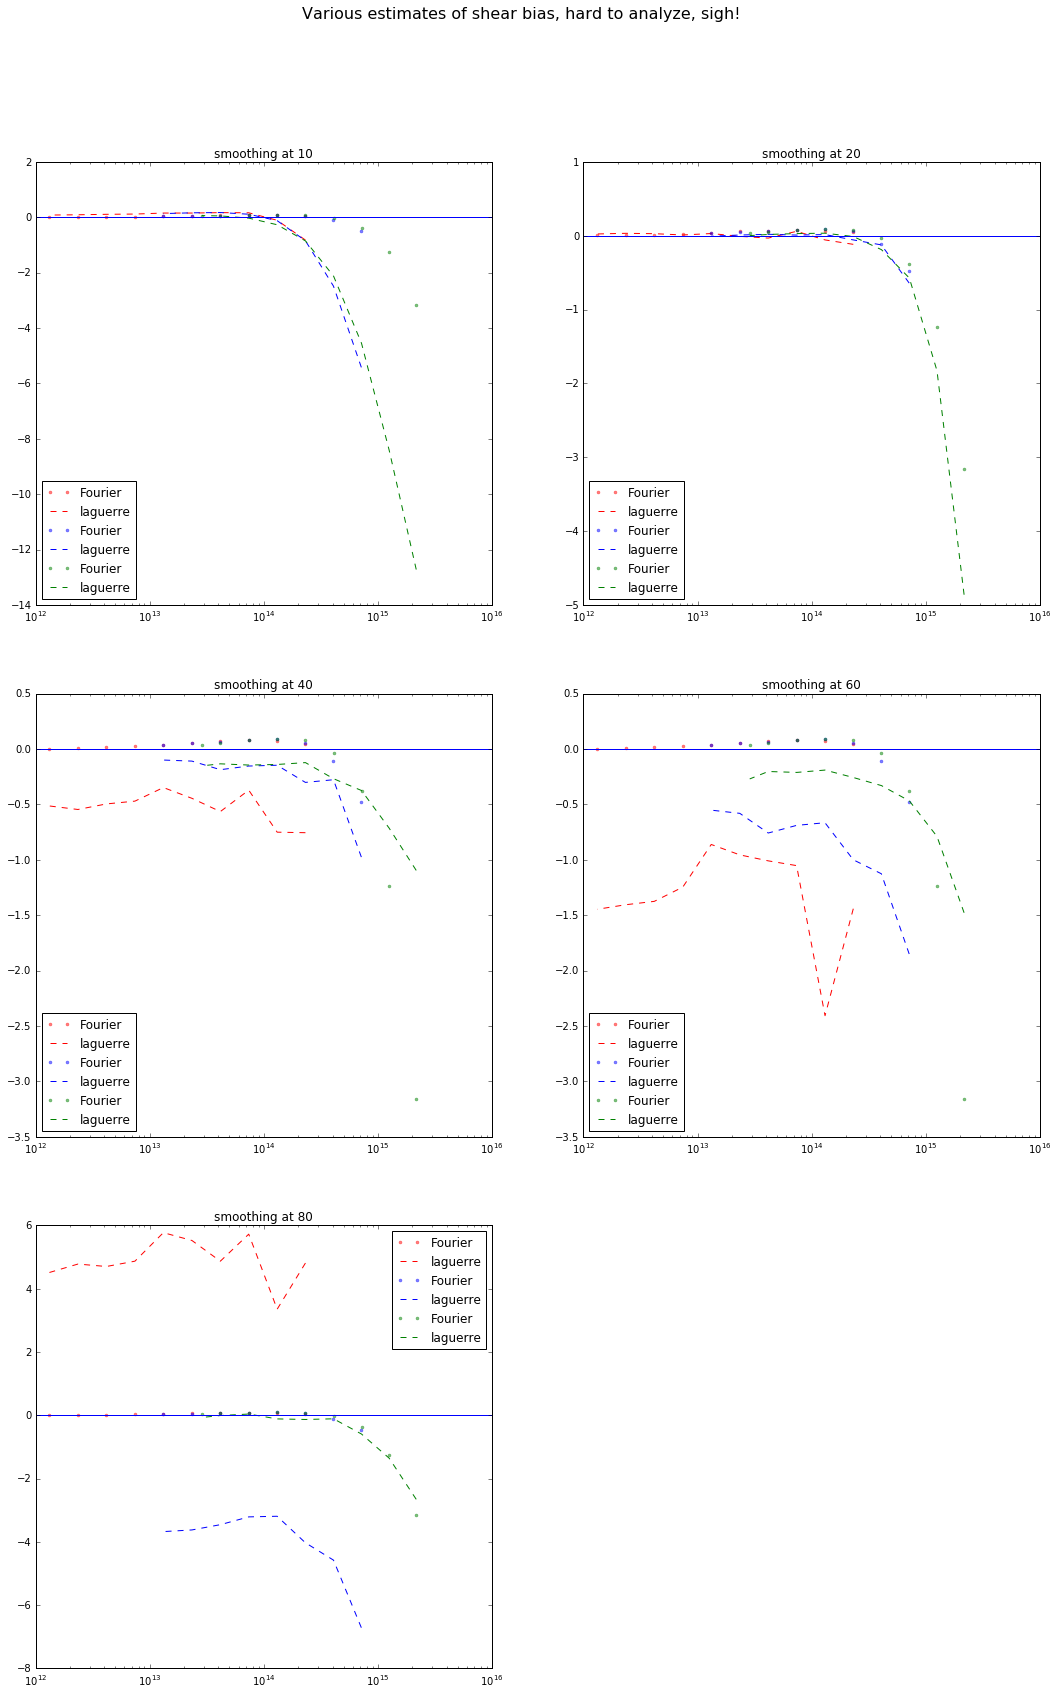

In [99]:
scheme = ['r', 'b', 'g', 'k']
plt.figure(figsize = (18, 27))
for boo in range(5):
    R = str(rvalues[boo])
    subplot(321 + boo)
    plt.title("smoothing at "+ R)
    for foo in range(3):
        pf = str(prefix[foo])
        plt.errorbar(temp[pf +"_m"], temp[pf + "_bf"]*2/15., fmt = ".", label = "Fourier", alpha = 0.5, color=scheme[foo])
        plt.errorbar(temp[pf +"_m"], temp[pf + "_breal_"+R],ls = "--", color=scheme[foo], label = "laguerre")    
    plt.xscale("log")
    plt.axhline(0)
    plt.legend(loc =0)

    
plt.suptitle("Various estimates of shear bias, hard to analyze, sigh!", fontsize = 16)
plt.show()

In [102]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Span
output_notebook()

x = list(temp["s_m"]) + list(temp["m_m"]) + list(temp["l_m"])
yf = list(temp["s_bf"]) + list(temp["m_bf"]) + list(temp["l_bf"])

## I can probably make this way more efficient by declaring an array instead of individual variables, but
## I do not try that here since that is not directly relevant to learning interactivity and checkboxes, which is 
## what I am interested in at the moment

y10 = list(temp["s_breal_10"]) + list(temp["m_breal_10"]) + list(temp["l_breal_10"])
y20 = list(temp["s_breal_20"]) + list(temp["m_breal_20"]) + list(temp["l_breal_20"])
y40 = list(temp["s_breal_40"]) + list(temp["m_breal_40"]) + list(temp["l_breal_40"])
y60 = list(temp["s_breal_60"]) + list(temp["m_breal_60"]) + list(temp["l_breal_60"])

p = figure(title="Shear bias with checboxes!", plot_height=300, plot_width=600, \
           x_range=(10**12, 10**16), x_axis_type = "log")
rf = p.cross(x, yf, color="red", size = 10, legend = "Fourier")
r10 = p.circle(x, y10, color="blue", legend = "R = 10")
r20 = p.circle(x, y20, color="green", legend = "R = 20")
r40 = p.circle(x, y40, color="cyan", legend = "R = 40")
r60 = p.circle(x, y60, color="orange", legend = "R = 60")
hline= Span(location = 0, dimension = 'width', line_width = 0.3)
p.renderers.extend([hline])
show(p, notebook_handle=True)



def my_function_update(R_10, R_20, R_40, R_60):
    nans = []
    for foo in range(len(r10.data_source.data['x'])):
        nans.append('nan')
    if R_10:
        yvs = []
        for foo in range(3):
            yvs += list(temp[prefix[foo] + "_breal_10"])
        r10.data_source.data['y'] = yvs
    else:
        r10.data_source.data['y'] = nans
    if R_20:
        yvs = []
        for foo in range(3):
            yvs += list(temp[prefix[foo] + "_breal_20"])
        r20.data_source.data['y'] = yvs
    else:
        r20.data_source.data['y'] = nans
    if R_40:
        yvs = []
        for foo in range(3):
            yvs += list(temp[prefix[foo] + "_breal_40"])
        r40.data_source.data['y'] = yvs
    else:
        r40.data_source.data['y'] = nans
    if R_60:
        yvs = []
        for foo in range(3):
            yvs += list(temp[prefix[foo] + "_breal_60"])
        r60.data_source.data['y'] = yvs
    else:
        r60.data_source.data['y'] = nans
    push_notebook()



Loading BokehJS ...

In [101]:
interact(my_function_update, R_10 = True, R_20 = True, R_40 = True, R_60 = True)

### To play with the next piece of code, restart kernel since the variables can clash


# #3. Brushing 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches

import ipywidgets as widgets

In [2]:
'''Read in the data'''
dt = {'names':("l-sepal", "w-sepal", "l-petal", "w-petal", "flower"), \
      'formats':('float32','float32','float32','float32','S20')}
data = pd.read_table("iris.data", sep=",", header=None)
data.columns = ("Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "flower")


In [3]:
'''Set the color scheme based on flower name'''
temp = ['r', 'b', 'g']
cscheme = {}
counter = 0
for foo in data['flower'].unique():
    cscheme[str(foo)]=temp[counter]
    counter +=1


In [4]:
# '''Make the scatter plot'''
# fig, axar = plt.subplots(4, 4, sharex = "col", sharey = "row", figsize = (12,12))
# for foo in range(4):
#     for boo in range(4):
#         axar[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
#                                    color=[ cscheme[i] for i in data['flower']])
# for foo in range(4):
#     axar[3-foo, foo].set_title(data.columns[foo])
#     axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
#     axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    


This code takes in the iris data and makes a scatter plot. For brushing, you can drag the mouse to select some points in a rectangle. The selected rectangle is highlighted and the corresponding data points in all other subplots are highlighted as well.
To reset, press the key 'd'. 

<IPython.core.display.Javascript object>


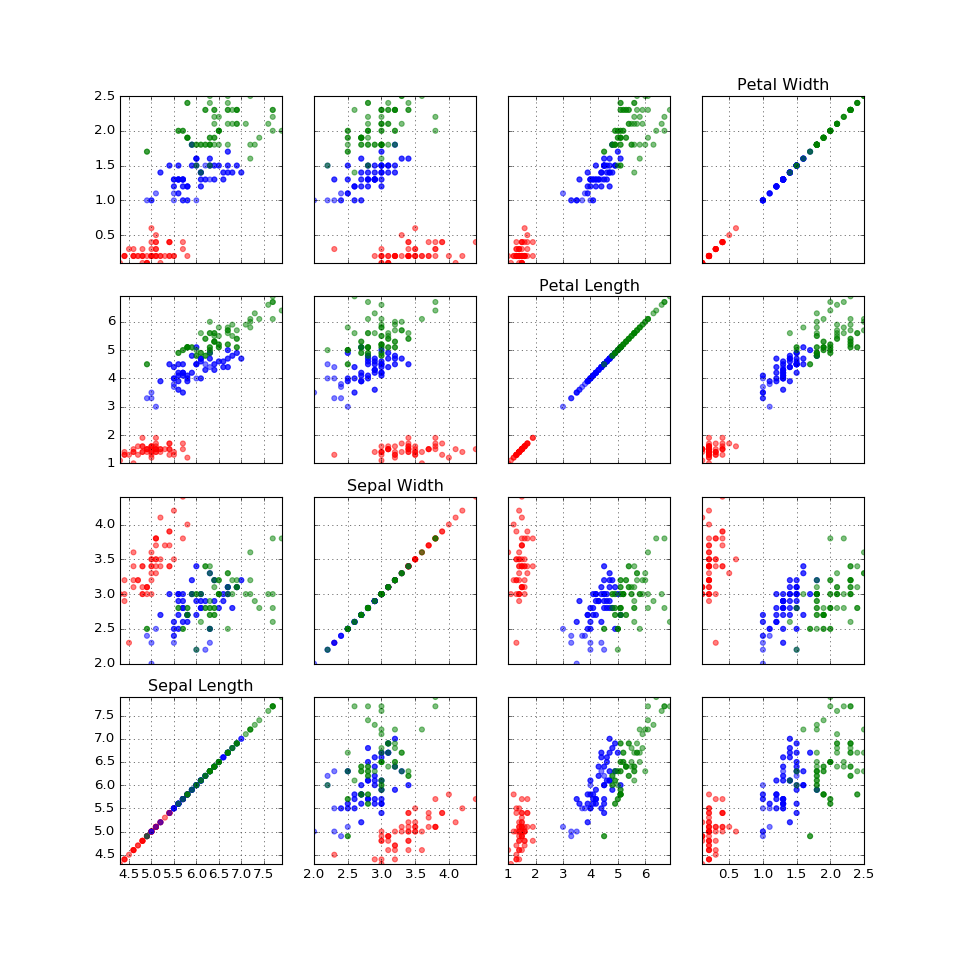

In [5]:
'''Make the scatter plot'''
fig, axar = plt.subplots(4, 4, sharex = "col", sharey = "row", figsize = (12,12))
scatters= np.empty_like(axar)
for foo in range(4):
    for boo in range(4):
        scatters[3- boo, foo] =axar[3 -boo, foo].scatter(data[data.columns[foo]], data[data.columns[boo]], \
                                   color=[ cscheme[i] for i in data['flower']], alpha = 0.5)
        axar[foo, boo].grid(True)
for foo in range(4):
    axar[3-foo, foo].set_title(data.columns[foo])
    axar[3-foo, foo].set_xlim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    axar[3-foo, foo].set_ylim(data[data.columns[foo]].min(), data[data.columns[foo]].max())
    

class Brushing():
    
    def __init__(self, fig, ax, data, scatters):
        self.fig = fig
        self.ax = ax
        self.mouse_press = 0
        self.x1 = None
        self.y1 = None
        self.x2 = None
        self.y2 = None
        self.patch = None
        self.data = data
        self.scatters = scatters
        self.scatters_brush = np.empty_like(scatters)
        self.axis = None
        
    def connect(self): 
        fig.canvas.mpl_connect("button_press_event", self.button_press_callback)
        fig.canvas.mpl_connect("button_release_event", self.button_release_callback)
        fig.canvas.mpl_connect("key_press_event", self.key_press_callback)
        

    def button_press_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x1 = event.xdata
            self.y1 = event.ydata
        
    def button_release_callback(self, event):
        if self.mouse_press == 1:return
        else:
            self.x2 = event.xdata
            self.y2 = event.ydata            
            #Sort xdata, ydata because mouse-dragged rectangle can be drawn in any direction
            x = np.array([self.x1, self.x2])
            x.sort()
            y = np.array([self.y1, self.y2])
            y.sort()
            #Find the axes and corresponding columns of data used. Find the corresponding rows in data-table
            for foo in range(self.ax.shape[0]):
                for boo in range(self.ax.shape[1]):
                    if self.ax[3- boo, foo] == event.inaxes:
                        self.axis = [3- boo, foo]
                        shade = patches.Rectangle((x[0], y[0]),x[1] - x[0],y[1] - y[0], alpha = 0.2, color = "yellow", lw=0)
                        self.ax[3 - boo, foo].add_patch(shade)
                        xdata = self.data[self.data.columns[foo]]
                        ydata = self.data[self.data.columns[boo]]
                        indicesx = self.out_range(xdata, x[0], x[1])
                        indicesy = self.out_range(ydata, y[0], y[1])
                        indiceout = list(set(indicesx) | set(indicesy))
            self.brush(indiceout)
            self.mouse_press = 1

            
    def brush(self, indiceout):
        '''2 step brushing: remove all points and re'''
        indicein = list(set(self.data.index) - set(indiceout))
        for foo in range(self.ax.shape[0]):
            for boo in range(self.ax.shape[1]):
                self.scatters[3- boo, foo].remove()
                self.scatters_brush[3- boo, foo] = \
                    self.ax[3 -boo, foo].scatter(data[data.columns[foo]][indiceout], \
                                                 data[data.columns[boo]][indiceout], \
                                   color="gray", alpha = 0.5)
                self.scatters[3- boo, foo] = \
                    self.ax[3 -boo, foo].scatter(data[data.columns[foo]][indicein], \
                                                 data[data.columns[boo]][indicein], \
                                   color=[ cscheme[i] for i in data['flower'][indicein]], alpha = 0.5)


    def key_press_callback(self, event):
        if event.key == "d":
            self.ax[self.axis[0], self.axis[1]].patches[0].remove()
            self.axis = None
            for foo in range(4):
                for boo in range(4):
                    self.scatters_brush[3- boo, foo].remove()
                    self.scatters[3- boo, foo]= self.ax[3 -boo, foo].scatter(self.data[self.data.columns[foo]], \
                                                                         self.data[self.data.columns[boo]], \
                                       color=[ cscheme[i] for i in self.data['flower']], alpha = 0.5)

            self.mouse_press = 0

    def out_range(self, datum, low, high):
        '''Return index values where data is not in between low and high'''
        temp = datum[datum > low]
        temp2 = temp[temp < high]
        indices = list(set(datum.index) - set(temp2.keys()))
        return indices


iris_brush = Brushing(fig, axar, data, scatters)
iris_brush.connect()
